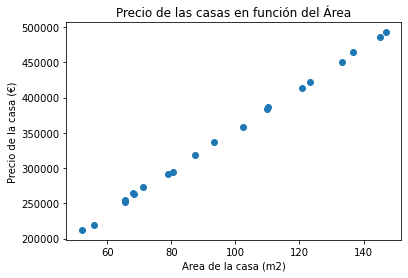

In [6]:
#Regresion lineal con Numpy

# y = W0 (interseccion) + W1 (pendiente) - X (variable independiente)

import numpy as np #libreria necesaria para trabajar con los datos
import matplotlib.pyplot as plt #Libreria necesaria para mostrar datos

# Fijar las semilla para obtener los mismmos resultados.
np.random.seed (42)

# Generar datos simulados: áreas de casas en metros cuadrados entre 50 y 150
area_casas = 50 + 100 * np.random.rand (20 , 1) # Generar 20 punto de datos entre 50 y 150 m

# El precio de las casas depende del área más un poco de variabilidad
# Fórmula simple: precio = 50000 + 3000 * area + ruido
precio_casas = 50000 + 3000 * area_casas + np.random.rand (20 , 1) * 10000

# Mostrar los datos en un gráfico
plt.scatter (area_casas, precio_casas)
plt.xlabel ("Area de la casa (m2)")
plt.ylabel ("Precio de la casa (€)")
plt.title ("Precio de las casas en función del Área")
plt.show ()

In [6]:
# 2. Implementación de la regresión lineal
import numpy as np #libreria necesaria para trabajar con los datos
import matplotlib.pyplot as plt #Libreria necesaria para mostrar datos
area_casas = 50 + 100 * np.random.rand (20 , 1)
precio_casas = 50000 + 3000 * area_casas + np.random.rand (20 , 1) * 10000
# Agregamos una columna de uno al área para la fórmula de la linea (facilita el cálculo al incluir un término constante)
area_casas_b = np.c_[np.ones((20, 1)), area_casas]

# Calculamos los parámetros de la línea usando la ecuación normal
# theta representa un vector que contiene los parámetros de la línea de regresión
# es decir, los valores de ( W_0) y ( W_1)
# theta = (X,T * X)^-1 * X.T * y
theta_mejor = np.linalg.inv(area_casas_b.T @ area_casas_b) @ area_casas_b.T @ precio_casas

# Mostrar los parámetros calculados  (intersección y pendiente)
print ("Parámetros de la línea de mejor ajuste (theta):", theta_mejor)

Parámetros de la línea de mejor ajuste (theta): [[55205.74210864]
 [ 3005.75470529]]


---

---

In [ ]:
# Regresión logística

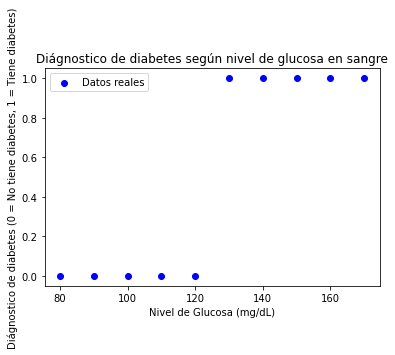

In [33]:
# Importar las siguientes librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Crear datos simples: nivel de glucosa en sangre y diagnóstico de diabetes (0 = No tiene diabetes, 1 = Tiene diabetes)
# Supongamos que estos son los datos que tenemos
niveles_glucosa = np.array ([80, 90, 100, 110, 120, 130, 140, 150, 160, 170]) # Niveles de glucosa en mg/dL
diagnostico_diabetes = np.array ([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 0 = No tiene diabetes, 1 = Tiene diabetes

# Crear un DataFrame con estos datos
df = pd.DataFrame ({
    'Nivel de Glucosa': niveles_glucosa,
    'Diagnóstico de Diabetes': diagnostico_diabetes
})

# Mostrar los datos en un gráfico de dispersión
plt.scatter(niveles_glucosa, diagnostico_diabetes, color='blue', label='Datos reales')
plt.xlabel("Nivel de Glucosa (mg/dL)")
plt.ylabel("Diágnostico de diabetes (0 = No tiene diabetes, 1 = Tiene diabetes)")
plt.title("Diágnostico de diabetes según nivel de glucosa en sangre")
plt.legend()
plt.show()

In [32]:
niveles_glucosa = np.array ([80, 90, 100, 110, 120, 130, 140, 150, 160, 170]) # Niveles de glucosa en mg/dL
diagnostico_diabetes = np.array ([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 0 = No tiene diabetes, 1 = Tiene diabetes

# Importar las librerias
from sklearn.model_selection import train_test_split # Importar la función para dividir los datos
from sklearn.linear_model import LogisticRegression # Importar el modelo de regresión logísitca
from sklearn.metrics import accuracy_score # Importar la métrica para evaluar la precisión

# Dividir los datos en conjuntos de entrenamiento y prueba
X = niveles_glucosa.reshape(-1, 1) # Convertir niveles de glucosa en un formato de 2 dimensiones
y = diagnostico_diabetes # Etiquetas (0 = No tiene diabetes, 1 = Tiene diabetes)

# Dividir los datos : 80% para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

# Hacer predicciones con el modelo entrenado
y_pred = modelo_logistico.predict(X_test)

# Evaluar la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print ("Precisión del modelo de regresión logística:", precision)

Precisión del modelo de regresión logística: 1.0


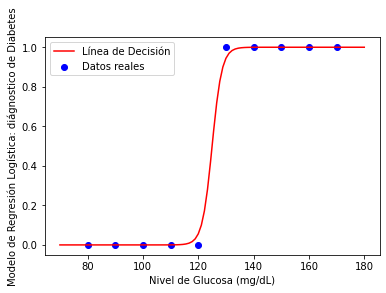

In [34]:
# Crear una secuencia de niveles de glucosa para mostrar la linea de decisión
niveles_glucosa_nuevos = np.linspace(70, 180, 100).reshape(-1, 1) # Crear 100 puntos entre 70 y 180 mg/dL

# Predecir las probabilidades de tener diabetes para estos nuevos niveles de glucosa
probabilidades = modelo_logistico.predict_proba(niveles_glucosa_nuevos) [:, 1] # Obtener la probabilidad de tener diabetes

# Dibujar la linea de decisión (probabilidad de tener diabetes)
plt.plot(niveles_glucosa_nuevos, probabilidades, color='red', label='Línea de Decisión')
plt.scatter(niveles_glucosa, diagnostico_diabetes, color='blue', label='Datos reales')
plt.xlabel("Nivel de Glucosa (mg/dL)")
plt.ylabel("Modelo de Regresión Logística: diágnostico de Diabetes")
plt.legend()
plt.show()